In [1]:
import sys
sys.path.append("../")

import gym
import d4rl

from diffuser.datasets.d4rl import sequence_dataset, load_environment
from diffuser.datasets.preprocessing import get_preprocess_fn

from diffuser.utils.rendering import Maze2dRenderer
from diffuser.datasets.sequence import GoalDataset

No module named 'flow'
/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'carla'
pybullet build time: Nov 28 2023 23:51:11
/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/matplotlib/__init__.py:202: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/matplotlib/backend_bases.py:60: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(PILLOW_VERSION) >= "3.4":
/home/cspark/anaconda3/

In [2]:
env_name = 'maze2d-large-v1'
env = load_environment('maze2d-large-v1')

renderer = Maze2dRenderer(env_name)

In [3]:
dataset = env.get_dataset()

load datafile: 100%|██████████| 8/8 [00:00<00:00, 10.63it/s]


In [5]:
for key, val in dataset.items():
    print(f"[{key}]: {val.shape}")
print(dataset['terminals'])

[actions]: (4000000, 2)
[infos/goal]: (4000000, 2)
[infos/qpos]: (4000000, 2)
[infos/qvel]: (4000000, 2)
[observations]: (4000000, 4)
[rewards]: (4000000,)
[terminals]: (4000000,)
[timeouts]: (4000000,)
[False False False ... False False False]


In [3]:
preprocess_fn = get_preprocess_fn(['maze2d_set_terminals'], env)

dataset = sequence_dataset(env, preprocess_fn)

dataset_list = list(dataset)

len(dataset_list)

load datafile: 100%|██████████| 8/8 [00:00<00:00, 10.56it/s]


[ utils/preprocessing ] Segmented maze2d-large-v1 | 1061 paths | min length: 67 | max length: 30470


1062

[ 7.000165    8.48544     0.03222217 -5.2262554 ]
[6.938172   9.446315   0.72132134 5.122354  ]
(2475, 4)
[[ 2.7936256   5.957799   -2.840004   -0.4287249 ]
 [ 2.767675    5.9518366  -2.5950763  -0.5962263 ]
 [ 2.7441676   5.9444733  -2.3507318  -0.73632914]
 ...
 [ 6.922475    9.344838    0.76621103  4.8049583 ]
 [ 6.9309587   9.395092    0.8483879   5.0253396 ]
 [ 6.938172    9.446315    0.72132134  5.122354  ]]


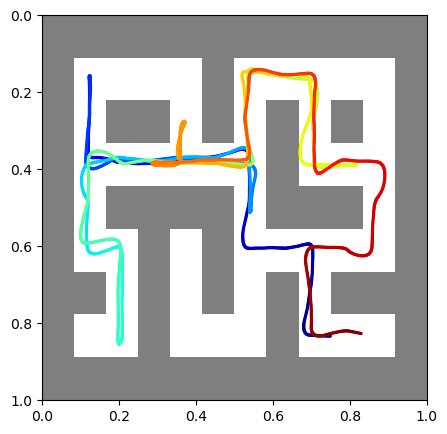

In [4]:
episode = dataset_list[100]
renderer.renders(episode['observations'][:]);
print(episode['observations'][0])
print(episode['observations'][-1])
print(episode['observations'].shape)
print(episode['observations'][200:2690])

In [6]:
dataset = GoalDataset(env=env_name, termination_penalty=None, horizon=256, 
                      normalizer='LimitsNormalizer', preprocess_fns=['maze2d_set_terminals'], 
                      use_padding=False, max_path_length=40000)

load datafile: 100%|██████████| 8/8 [00:00<00:00, 10.63it/s]


[ utils/preprocessing ] Segmented maze2d-large-v1 | 1061 paths | min length: 67 | max length: 30470
[ datasets/buffer ] Finalized replay buffer | 1062 episodes
[ datasets/buffer ] Fields:
    actions: (1062, 40000, 2)
    infos/goal: (1062, 40000, 2)
    infos/qpos: (1062, 40000, 2)
    infos/qvel: (1062, 40000, 2)
    observations: (1062, 40000, 4)
    rewards: (1062, 40000, 1)
    terminals: (1062, 40000, 1)
    timeouts: (1062, 40000, 1)
    next_observations: (1062, 40000, 4)
    normed_observations: (1062, 40000, 4)
    normed_actions: (1062, 40000, 2)


In [7]:
data = next(iter(dataset))

In [12]:
print(data.trajectories.shape)
print(dataset.__len__())

(256, 6)
3787613


  0%|          | 0/16726 [00:00<?, ?it/s]

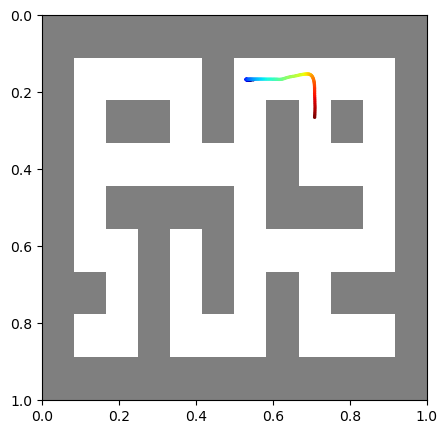

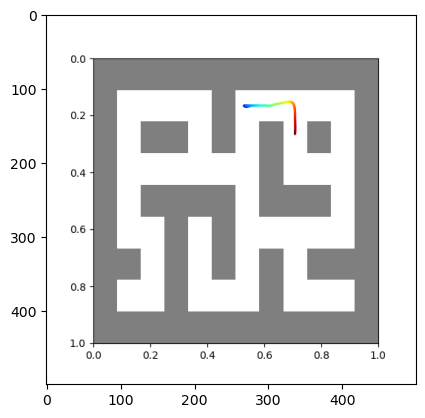

 10%|█         | 1735/16726 [00:00<00:01, 11934.98it/s]

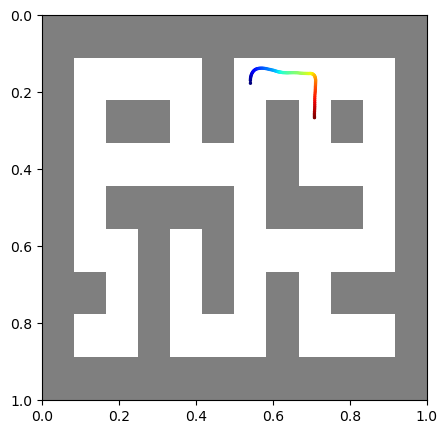

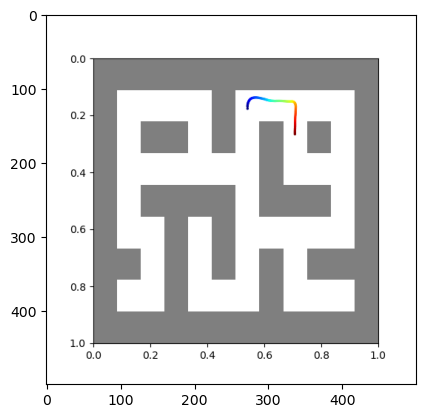

 18%|█▊        | 2929/16726 [00:00<00:01, 9744.56it/s] 

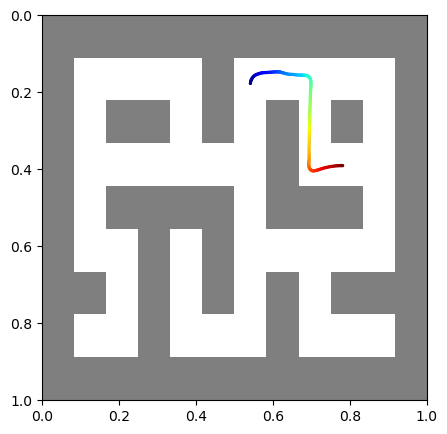

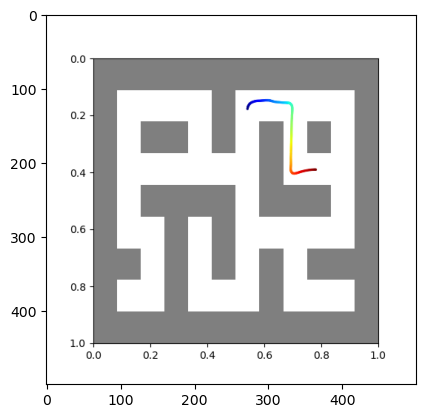

 23%|██▎       | 3904/16726 [00:00<00:01, 8549.67it/s]

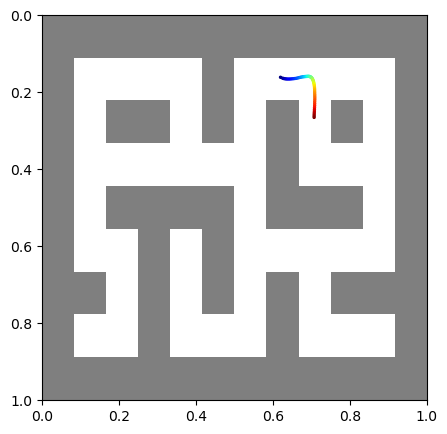

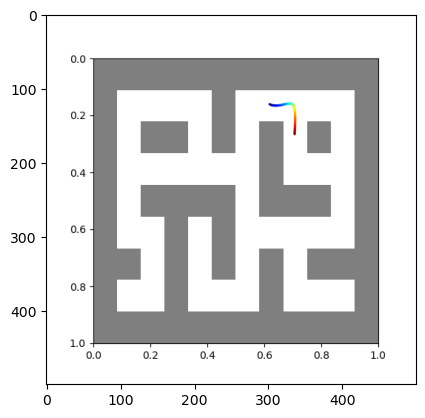

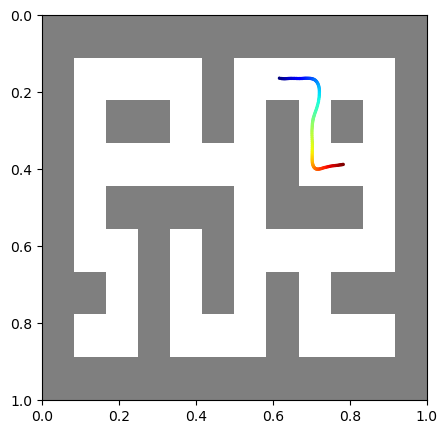

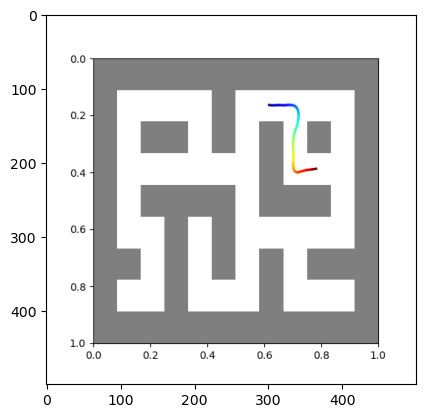

 28%|██▊       | 4756/16726 [00:00<00:02, 5579.45it/s]

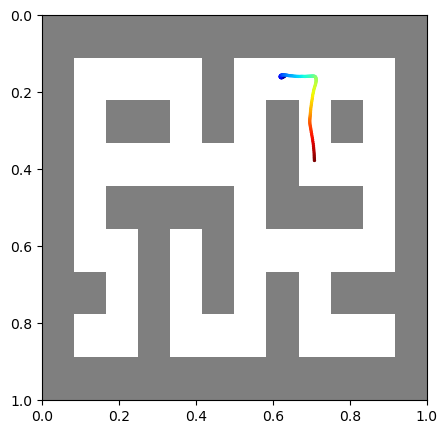

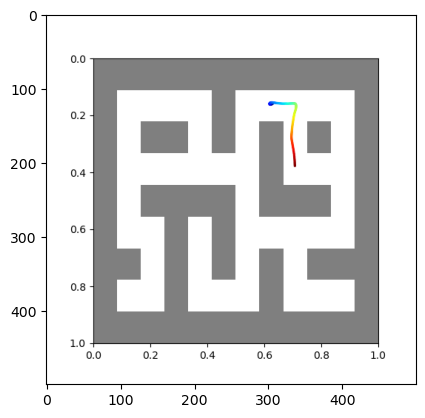

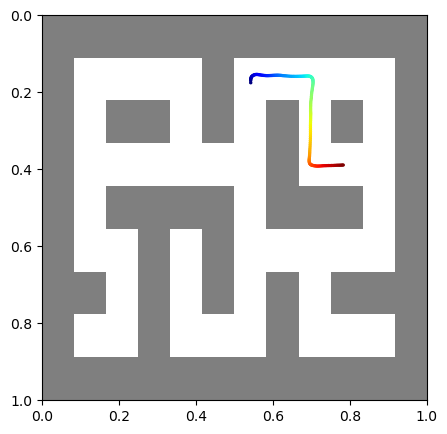

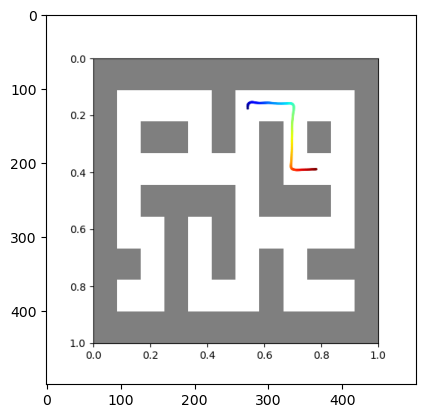

 32%|███▏      | 5397/16726 [00:00<00:02, 4141.43it/s]

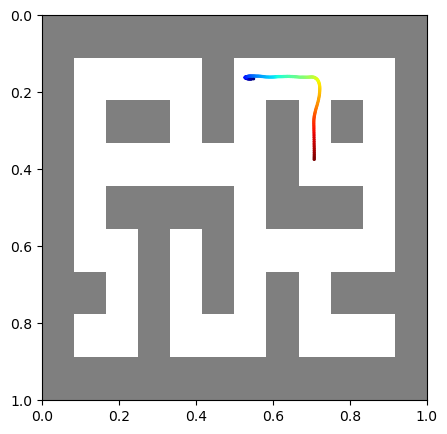

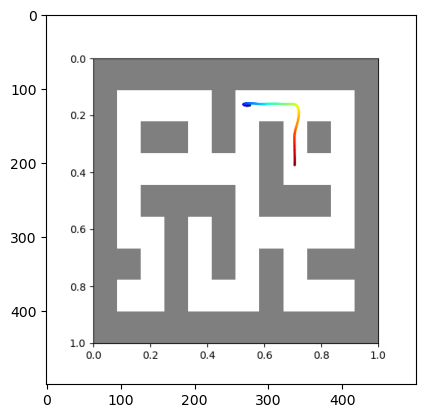

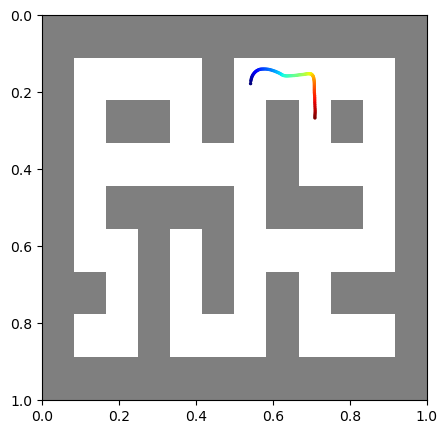

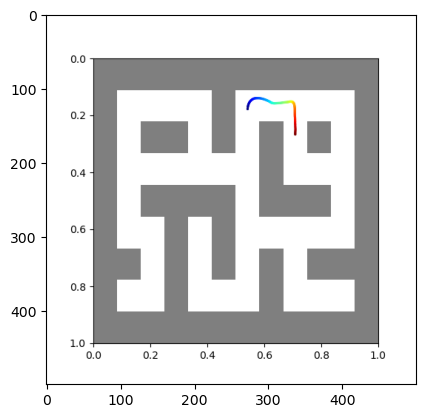

 35%|███▌      | 5892/16726 [00:01<00:03, 3240.95it/s]

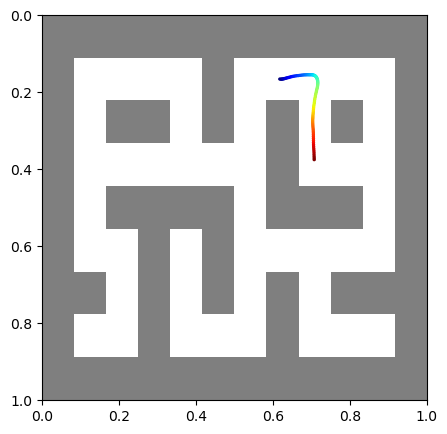

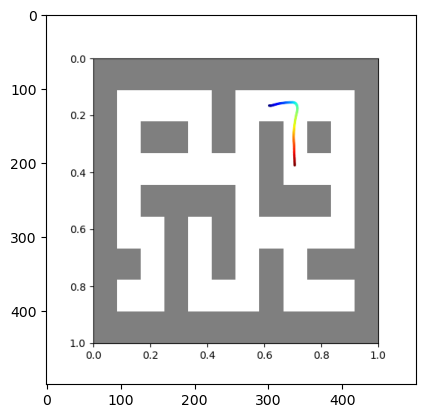

 40%|███▉      | 6671/16726 [00:01<00:02, 3767.27it/s]

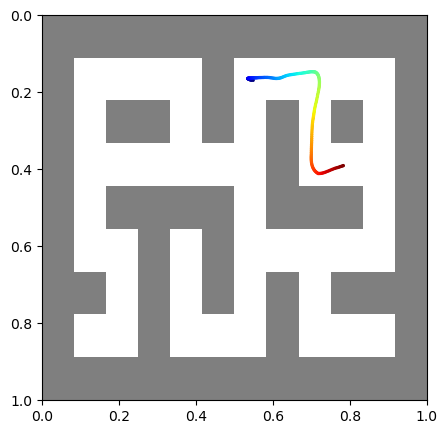

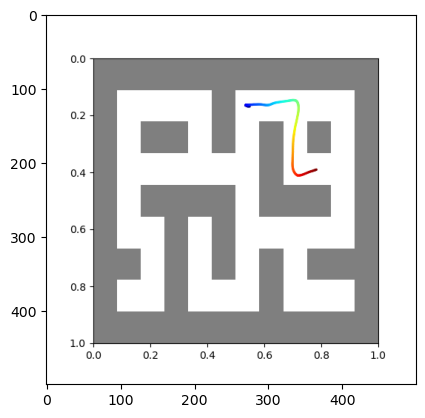

 43%|████▎     | 7117/16726 [00:01<00:02, 3637.57it/s]

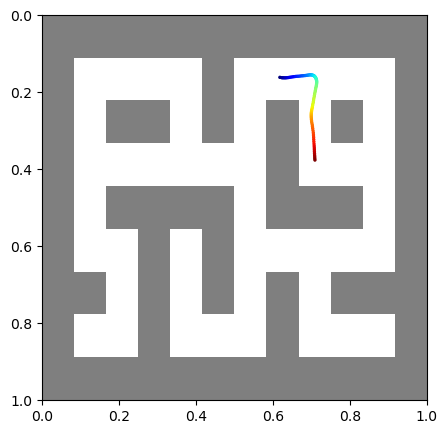

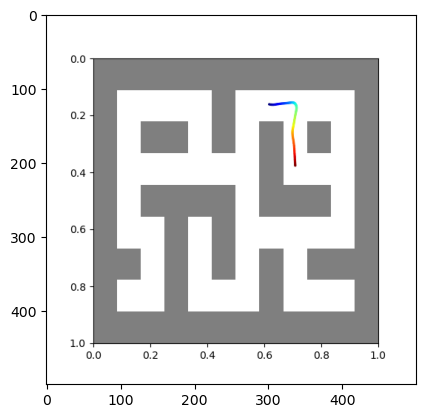

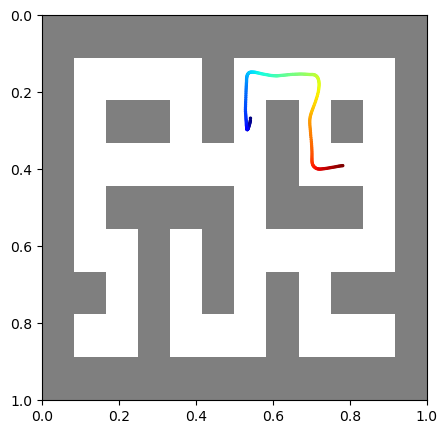

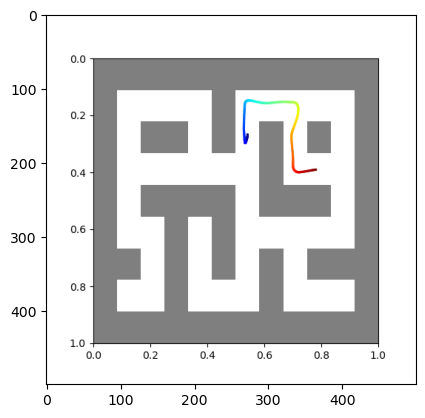

 45%|████▍     | 7524/16726 [00:01<00:03, 2771.30it/s]

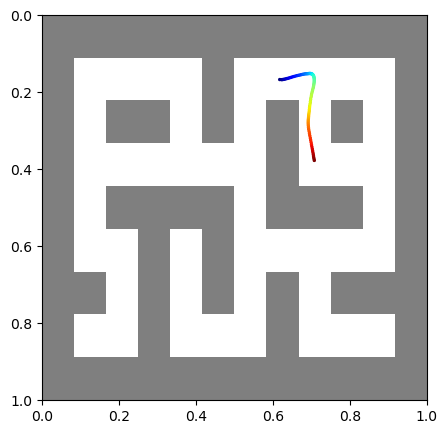

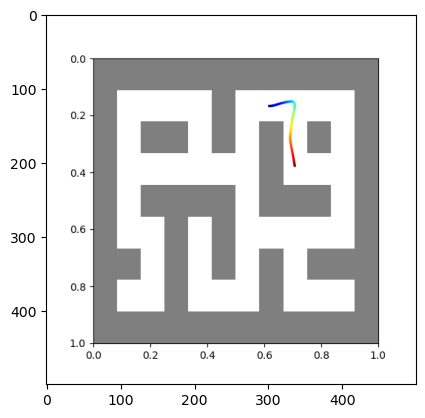

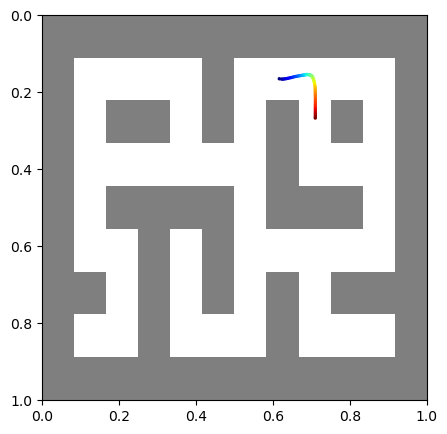

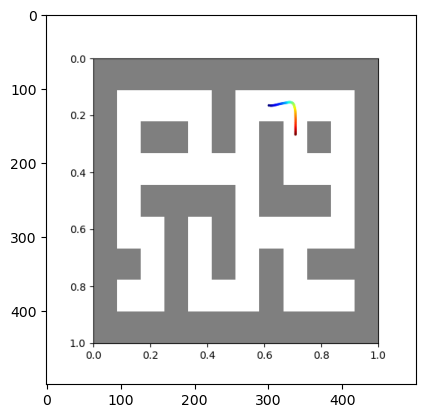

 47%|████▋     | 7850/16726 [00:02<00:04, 2199.95it/s]

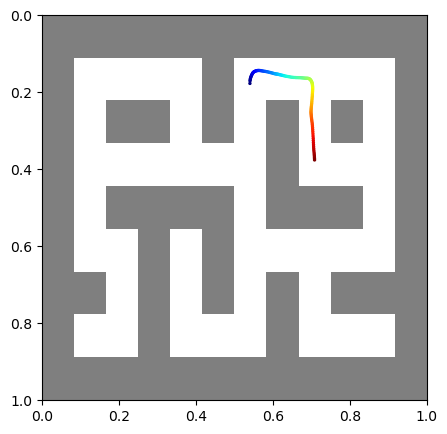

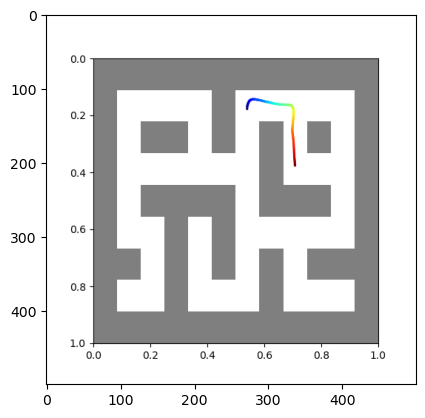

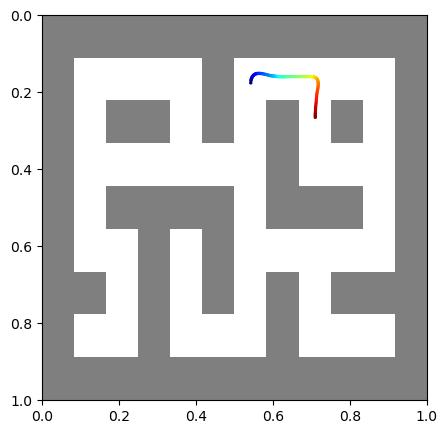

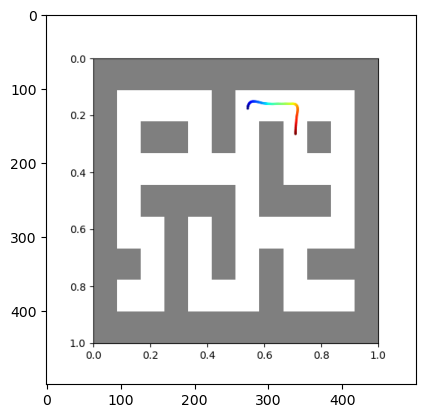

 49%|████▊     | 8113/16726 [00:02<00:04, 1778.55it/s]

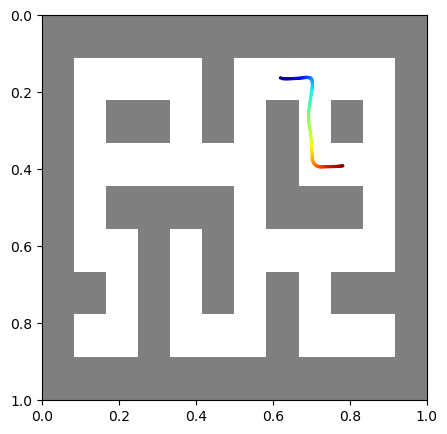

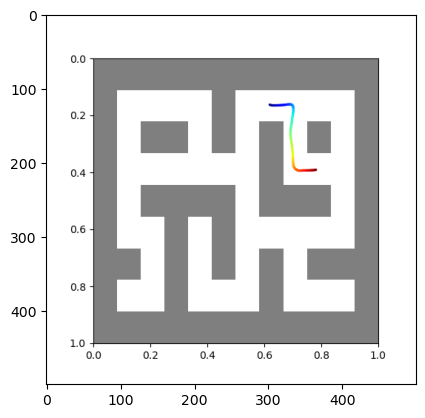

 50%|█████     | 8403/16726 [00:02<00:04, 1844.89it/s]

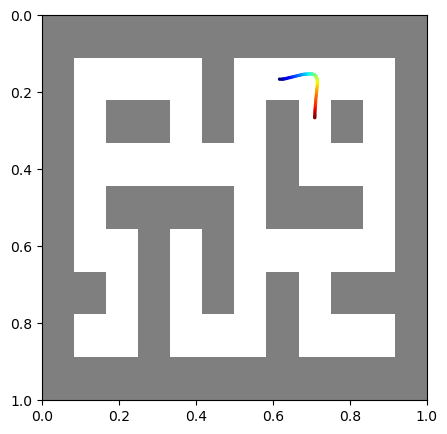

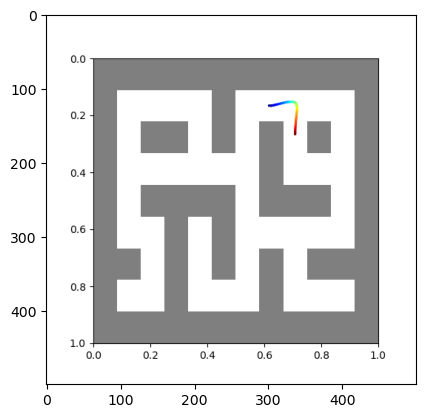

 56%|█████▌    | 9396/16726 [00:02<00:02, 3019.00it/s]

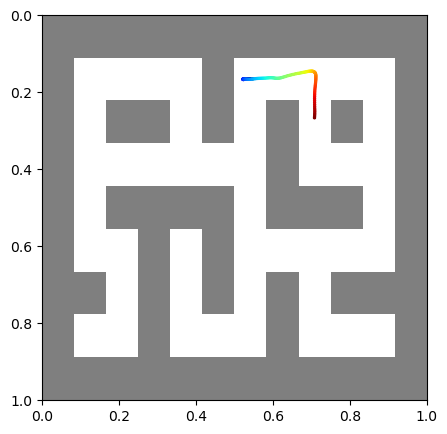

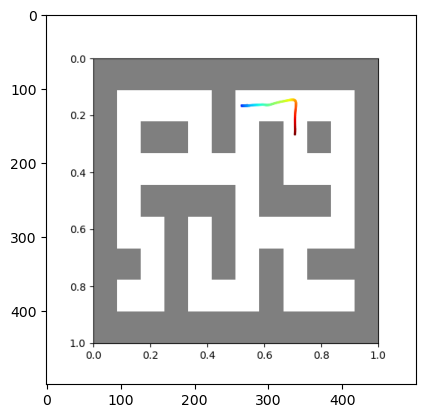

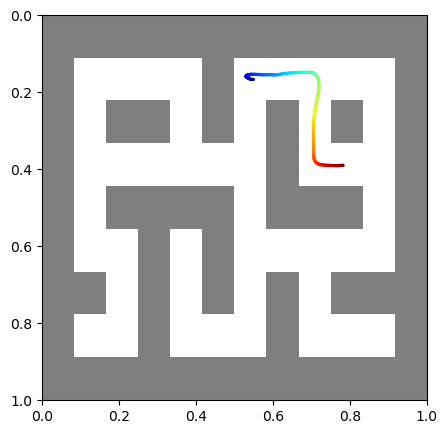

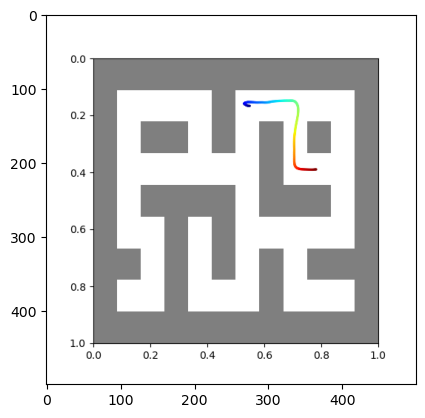

 58%|█████▊    | 9759/16726 [00:02<00:03, 2145.49it/s]

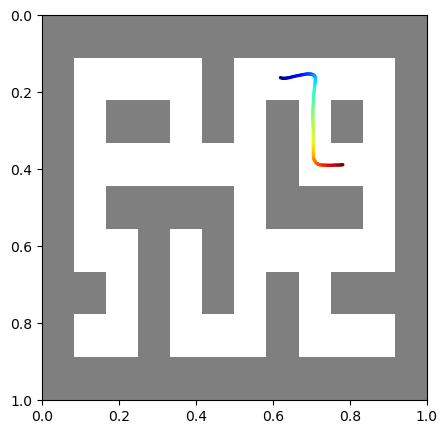

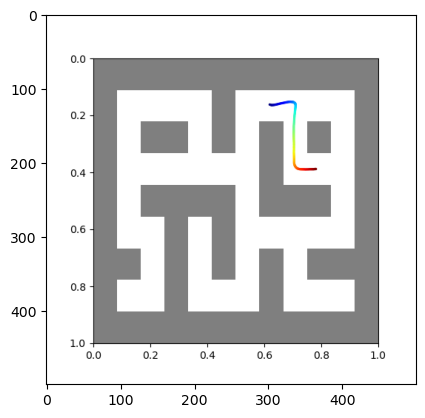

 64%|██████▍   | 10731/16726 [00:03<00:01, 3113.38it/s]

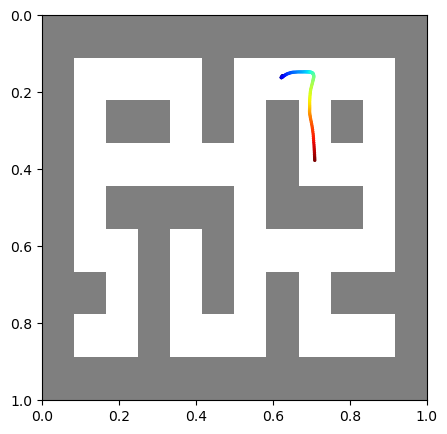

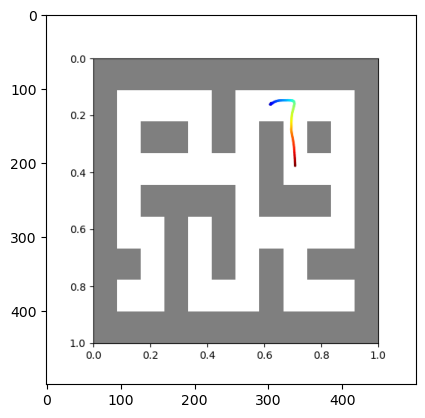

 67%|██████▋   | 11137/16726 [00:03<00:01, 3076.53it/s]

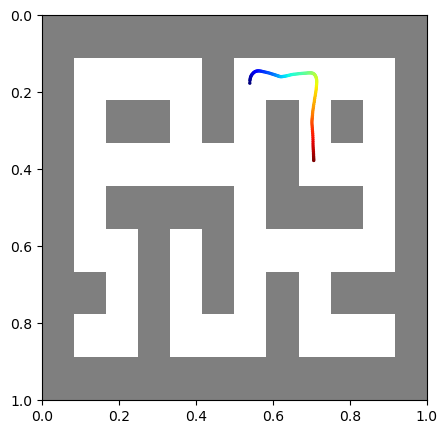

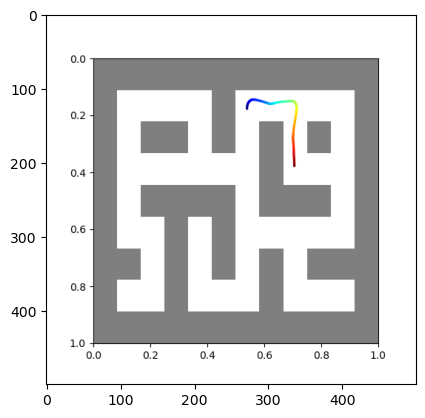

 70%|███████   | 11767/16726 [00:03<00:01, 3421.65it/s]

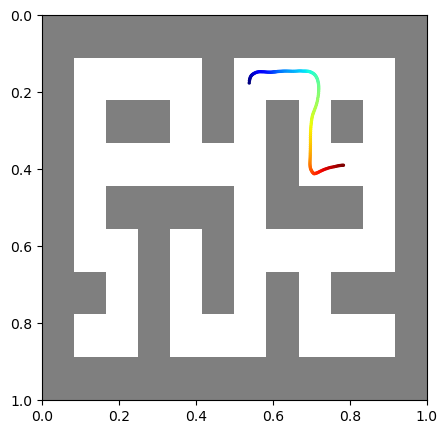

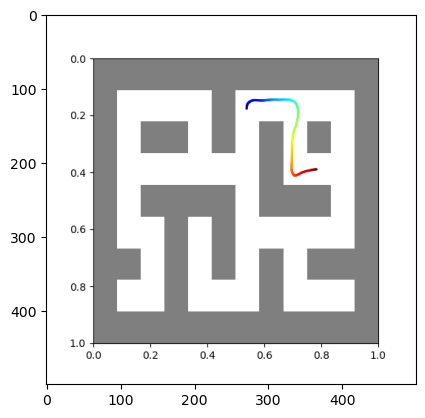

 74%|███████▍  | 12386/16726 [00:03<00:01, 3686.80it/s]

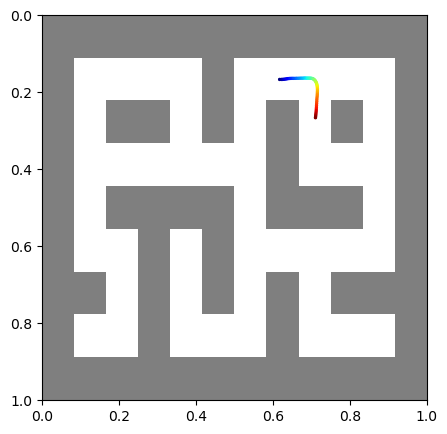

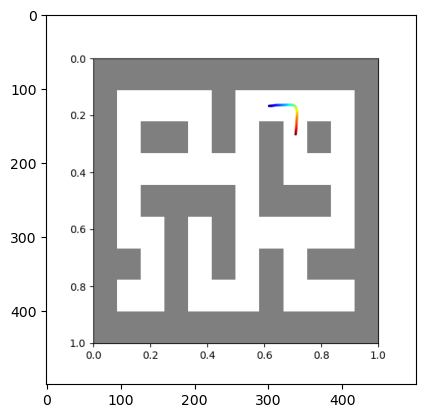

 77%|███████▋  | 12866/16726 [00:03<00:01, 3625.58it/s]

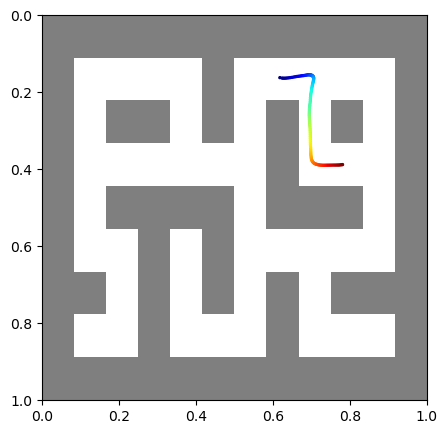

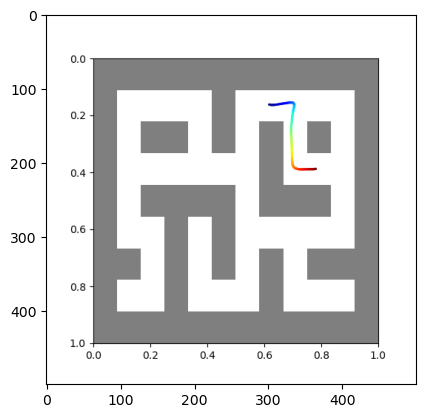

 80%|███████▉  | 13320/16726 [00:03<00:00, 3535.80it/s]

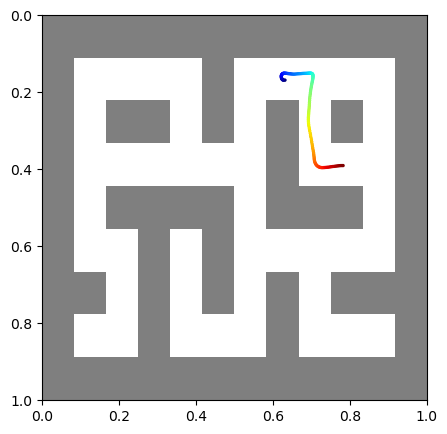

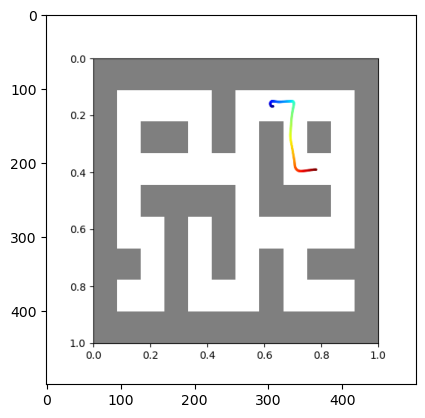

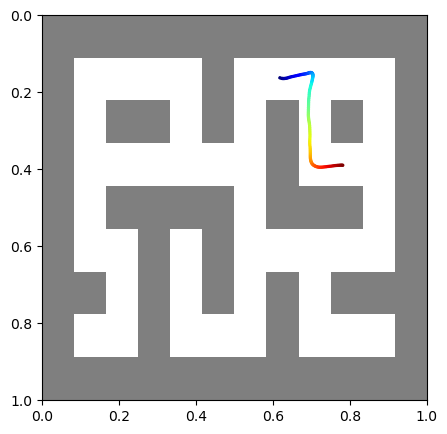

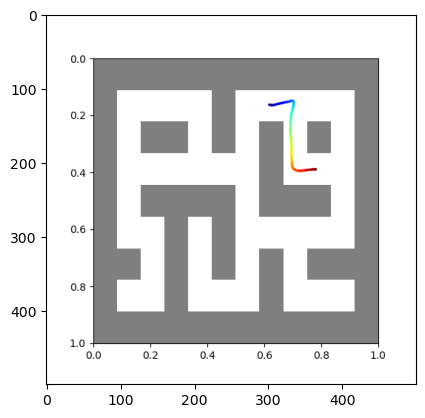

 82%|████████▏ | 13693/16726 [00:04<00:01, 2579.37it/s]

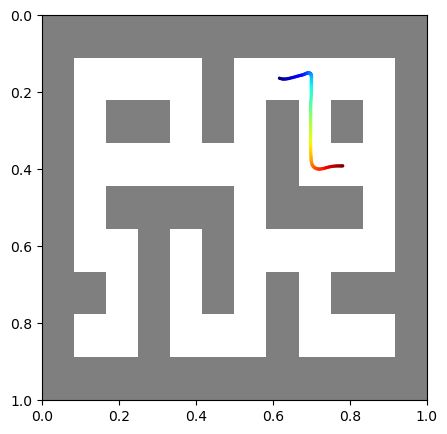

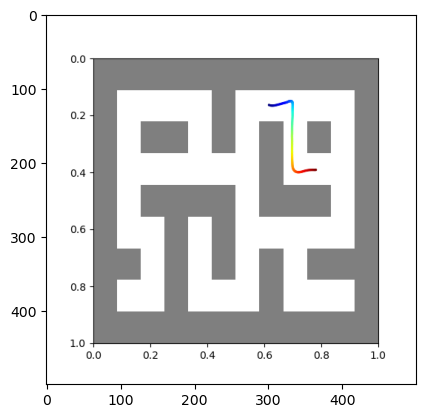

 84%|████████▍ | 14045/16726 [00:04<00:01, 2566.35it/s]

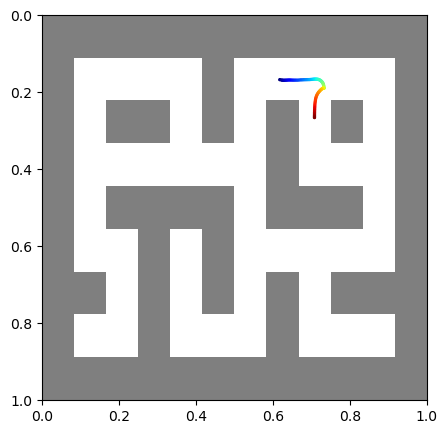

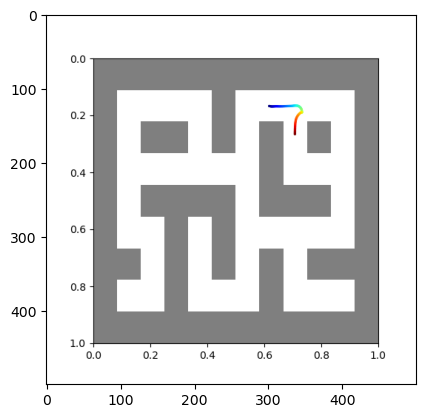

 86%|████████▌ | 14332/16726 [00:04<00:00, 2448.62it/s]

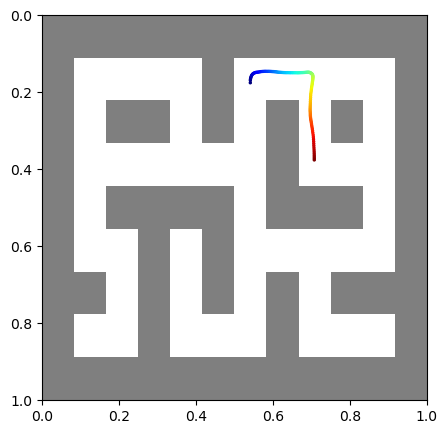

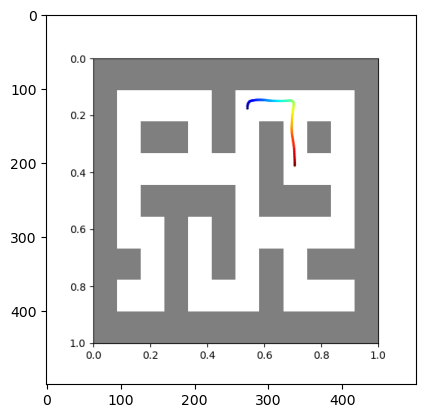

 88%|████████▊ | 14708/16726 [00:04<00:00, 2515.13it/s]

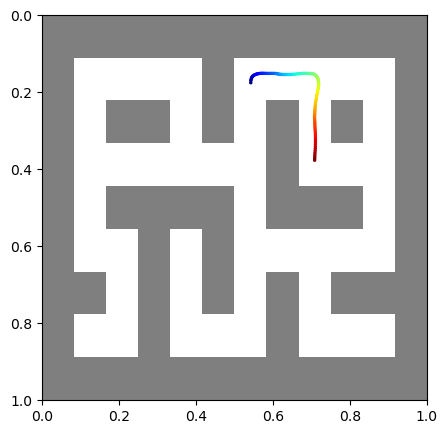

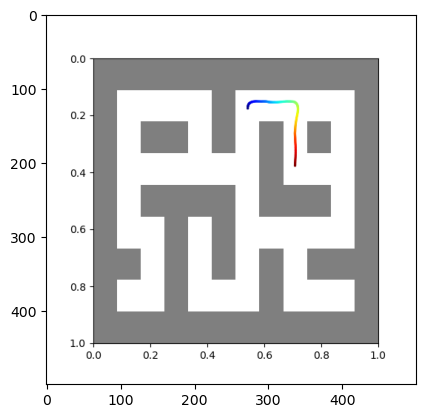

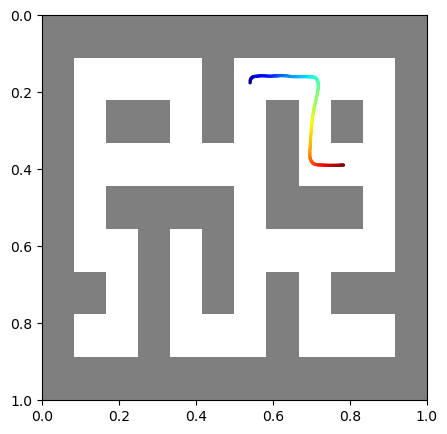

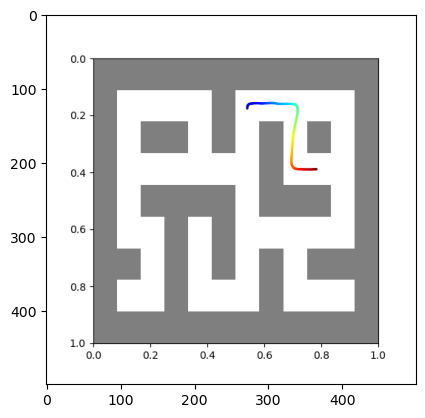

 90%|████████▉ | 14974/16726 [00:04<00:00, 1842.51it/s]

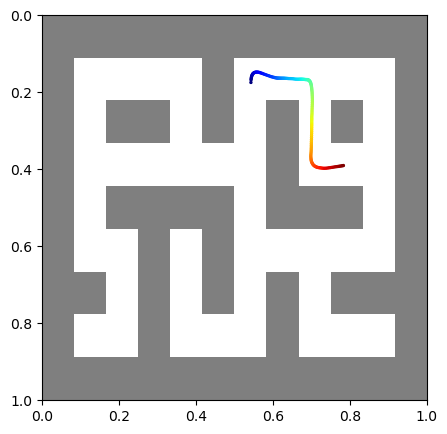

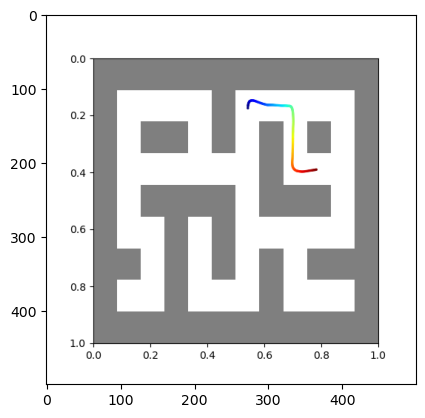

 91%|█████████ | 15229/16726 [00:04<00:00, 1839.10it/s]

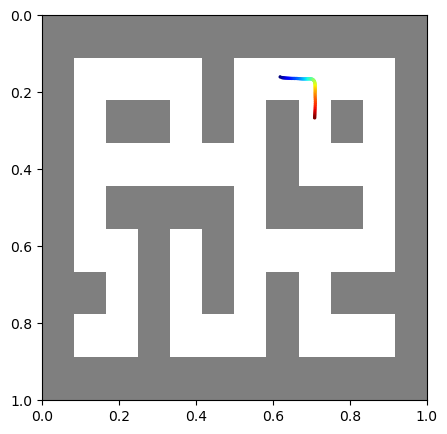

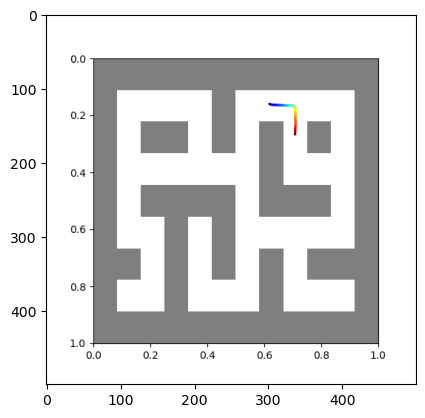

 93%|█████████▎| 15510/16726 [00:05<00:00, 1894.66it/s]

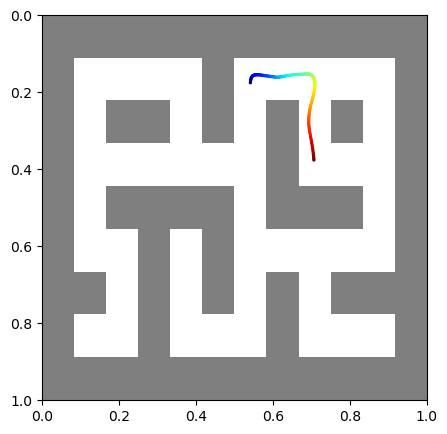

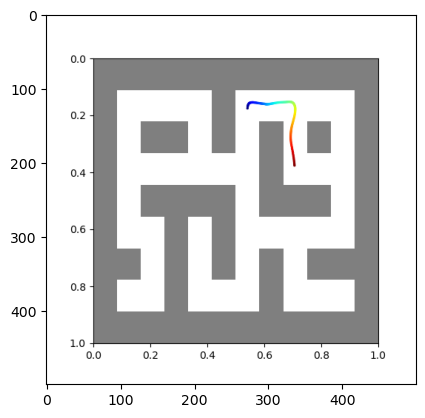

 94%|█████████▍| 15716/16726 [00:05<00:00, 1785.32it/s]

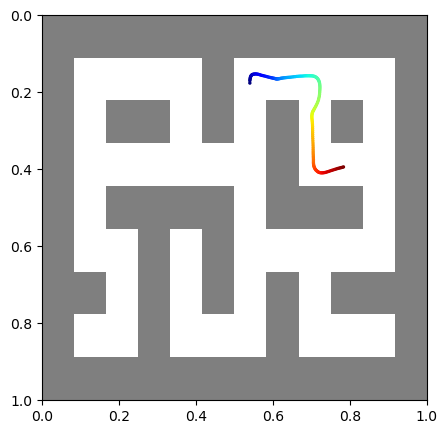

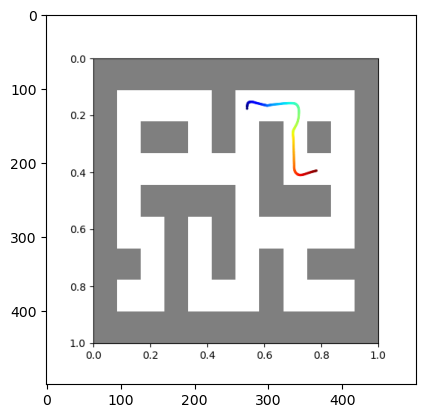

 96%|█████████▌| 16082/16726 [00:05<00:00, 2014.14it/s]

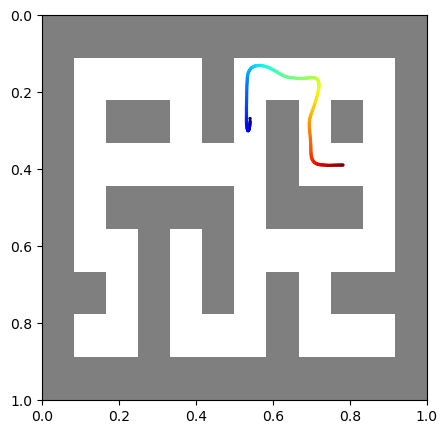

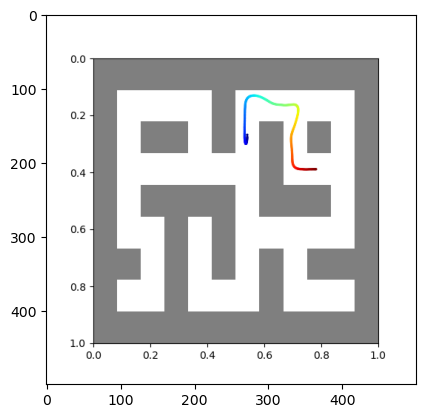

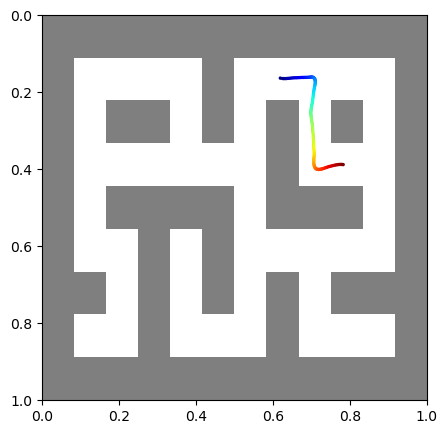

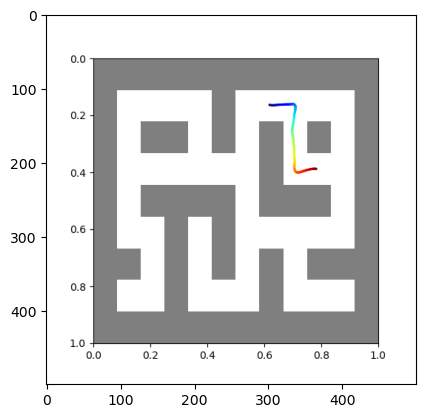

 97%|█████████▋| 16293/16726 [00:05<00:00, 1464.75it/s]

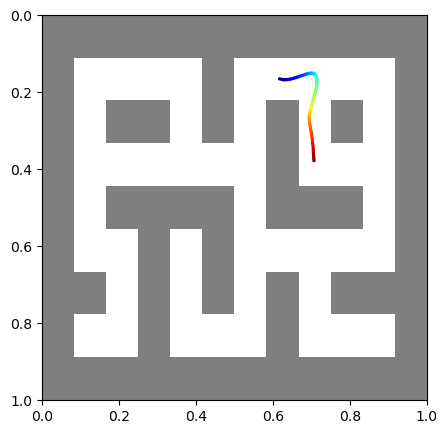

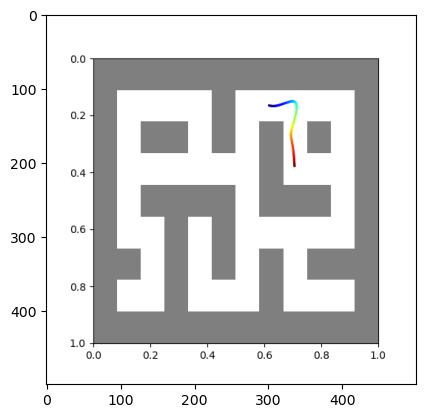

 98%|█████████▊| 16463/16726 [00:05<00:00, 1409.68it/s]

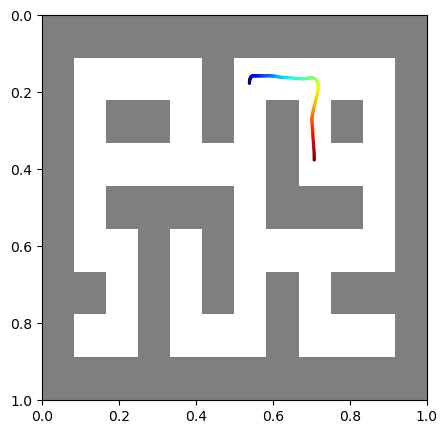

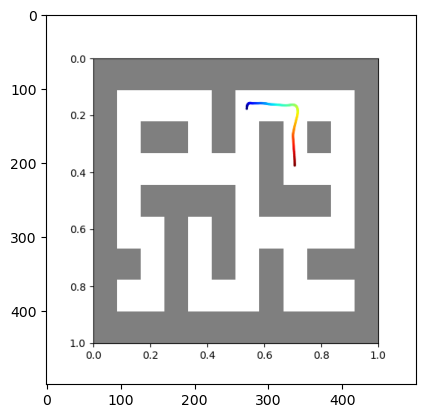

100%|██████████| 16726/16726 [00:05<00:00, 2849.66it/s]

(542, 4)
[[ 2.9340837   9.068717    1.1311696  -1.4449039 ]
 [ 2.9509258   9.042297    0.79389125 -1.4385968 ]
 [ 2.9564643   9.026317    0.55383664 -1.5981367 ]
 [ 2.9607341   9.009776    0.42698526 -1.6540339 ]
 [ 2.9626122   8.992462    0.18780449 -1.7313873 ]
 [ 2.962104    8.972808   -0.05080663 -1.9654276 ]
 [ 2.9606159   8.950819   -0.14881434 -2.1989105 ]
 [ 2.9567497   8.926842   -0.38662377 -2.397751  ]
 [ 2.950511    8.901212   -0.6238668  -2.5629616 ]
 [ 2.9430118   8.873737   -0.7499159  -2.7474341 ]
 [ 2.9357293   8.843961   -0.7282483  -2.9776726 ]
 [ 2.9272184   8.811873   -0.8510888  -3.2087448 ]
 [ 2.9198782   8.778967   -0.73401845 -3.2906203 ]
 [ 2.9134634   8.743757   -0.64148325 -3.520947  ]
 [ 2.9077885   8.70625    -0.5674916  -3.7507253 ]
 [ 2.9020128   8.6664505  -0.57756793 -3.9799562 ]
 [ 2.8956769   8.624364   -0.6336037  -4.208641  ]
 [ 2.8897257   8.5819     -0.59510475 -4.246465  ]
 [ 2.882731    8.537154   -0.6994804  -4.4745154 ]
 [ 2.8771727   8.49114

In [13]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

# ref = np.array([[2.10, 6.01]])
# ref = np.array([[0.5, 6.01]])
ref = np.array([[2.8,8.51]])

ref = np.array([[0.5, 6.01],[2.8,8.51]])

obs_list = []
for episode in tqdm(dataset_list):
    try:
        if np.linalg.norm(ref-np.array([episode['observations'][0, :2], episode['observations'][-1, :2]])) < 1.5:
            img = renderer.renders(episode['observations'])
            plt.figure()
            plt.imshow(img)
            plt.show()
    except:
        pass

print(episode['observations'].shape)
print(episode['observations'][:20])

In [ ]:
np.linalg.norm(ref - np.array([episode['observations'][0, :2], episode['observations'][-1, :2]]))

In [12]:
import numpy as np
target_loc_org = np.array([[3, 5]], dtype=float)
np.tile(target_loc_org, 2)

array([[3., 5., 3., 5.]])

No module named 'flow'
/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'carla'
pybullet build time: Nov 28 2023 23:51:11


[ environments/maze2d ] getting dataset for maze2d-open-sparse-stateonly
[ datasets/buffer ] Finalized replay buffer | 20 episodes
[ datasets/buffer ] Fields:
    observations: (20, 40000, 2)
    actions: (20, 40000, 0)
    rewards: (20, 40000, 1)
    terminals: (20, 40000, 1)
    info/goal: (20, 40000, 2)
    info/qpos: (20, 40000, 4)
    info/qvel: (20, 40000, 4)
    timeouts: (20, 40000, 1)
    next_observations: (20, 40000, 2)
    normed_observations: (20, 40000, 2)
    normed_actions: (20, 40000, 0)


/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/matplotlib/__init__.py:202: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/matplotlib/backend_bases.py:60: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(PILLOW_VERSION) >= "3.4":
/home/cspark/anaconda3/envs/diffuser/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


[ models/temporal ] Channel dimensions: [(2, 32), (32, 128), (128, 256)]
[(2, 32), (32, 128), (128, 256)]
Saved 10 samples to: logs/maze2d-open-v1-state/w_conditon_H10_long_intersection_length-sliced/_sample-reference.png


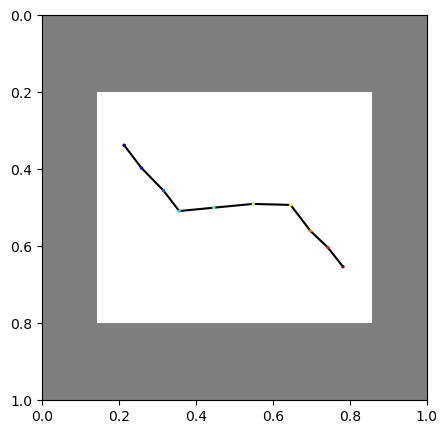

In [1]:
import os
import sys

import gym
import d4rl
from PIL import Image
import numpy as np

horizon = 10

env_name = 'maze2d-open-v1-state'
device = 1
savepath = f"logs/{env_name}/w_conditon_H{horizon}_long_intersection_length-sliced"
os.makedirs(savepath, exist_ok=True)

# get dataset
from diffuser.datasets import GoalDataset, UnconditionedDataset

dataset = UnconditionedDataset(env=env_name, termination_penalty=None, 
                      horizon=horizon,
                      normalizer='LimitsNormalizer', 
                      preprocess_fns=['maz2d_only_state'],
                      use_padding=False,
                      max_path_length=40000
                      )

# Get renderer
from diffuser.utils.rendering import Maze2dRenderer

renderer = Maze2dRenderer(env_name)

# Get model
from diffuser.models import TemporalUnet

observation_dim = dataset.observation_dim
action_dim = dataset.action_dim

model = TemporalUnet(horizon=horizon, 
                     transition_dim=observation_dim + action_dim,
                     cond_dim=observation_dim,
                     dim_mults=(1, 4, 8),
                     )
model.to(device=device);

# Get diffusion model
from diffuser.models import GaussianDiffusion

diffusion = GaussianDiffusion(
    model=model,
    horizon=horizon,
    observation_dim=observation_dim,
    action_dim=action_dim,
    n_timesteps=64,
    loss_type='l2',
    clip_denoised=True,
    predict_epsilon=False,
    action_weight=1,
    loss_weights=None,
    loss_discount=1,
)
diffusion.to(device=device);

# Get Trainer
from diffuser.utils import Trainer

trainer = Trainer(
    diffusion_model=diffusion,
    dataset=dataset,
    renderer=renderer,
    train_batch_size=64,
    train_lr=2e-4,
    gradient_accumulate_every=1,
    ema_decay=0.995,
    sample_freq=1000,
    save_freq=1000,
    label_freq=int(2e5//50),
    save_parallel=False,
    results_folder=savepath,
    bucket=None,
    n_reference=50,
    n_samples=10,
)

trainer.render_reference()

In [6]:
import torch
import torch.nn as nn
m = nn.Conv1d(16, 33, 3)
input = torch.randn(20, 16, 9)
output = m(input)
print(output.shape)

torch.Size([20, 33, 7])


In [1]:
import torch

a = torch.tensor([[0, 0], [0, 0], [0, 0]])
b = torch.tensor([[1], [1], [1]])
print(a+b)

tensor([[1, 1],
        [1, 1],
        [1, 1]])


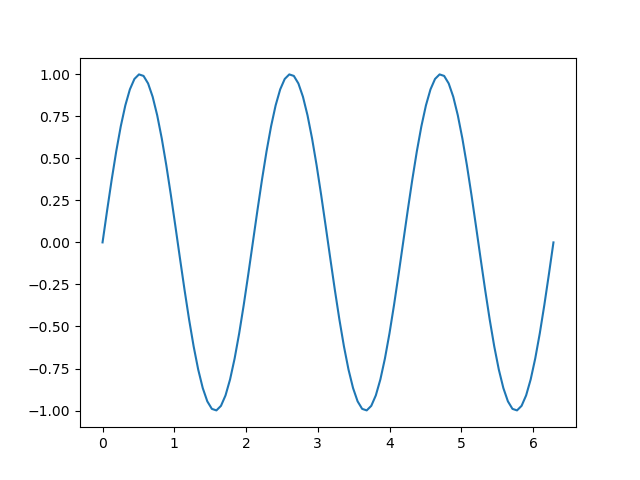

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.75, 'type': 'set_device_pixel_ratio'}


In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)